In [1]:
# 10일차 코드
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from sklearn.model_selection import train_test_split
from torch import nn


device = "cuda" if torch.cuda.is_available() else "cpu"

def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()  # torch.eq() calculates where two tensors are equal (두 텐서의 각 원소를 비교하여 값이 같으면 True, 다르면 False를 반환)
    acc = (correct/len(y_pred))*100
    return acc

n_samples = 1000

X, y = make_circles(n_samples = 1000, noise = 0.03, random_state = 42,)


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features=10)
        self.layer_2 = nn.Linear(in_features = 10, out_features=10)
        self.layer_3 = nn.Linear(in_features =10, out_features =1)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)

In [2]:
# where should put the non-linear activation functions when constructing a neural network?
# -> a rule of thumb is to put them in between hidden layers and just after the ouput layer (however there is no set in stone option)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

torch.manual_seed(42)
epochs =1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred =test_pred)

        if epoch % 100 ==0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69252, Accuracy: 50.00% | Test Loss: 0.69405, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68600, Accuracy: 53.62% | Test Loss: 0.69122, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.68354, Accuracy: 53.37% | Test Loss: 0.69184, Test Accuracy: 48.50%
Epoch: 300 | Loss: 0.68124, Accuracy: 54.00% | Test Loss: 0.69153, Test Accuracy: 48.00%
Epoch: 400 | Loss: 0.67856, Accuracy: 53.87% | Test Loss: 0.69047, Test Accuracy: 48.50%
Epoch: 500 | Loss: 0.67536, Accuracy: 54.00% | Test Loss: 0.68851, Test Accuracy: 49.50%
Epoch: 600 | Loss: 0.67109, Accuracy: 54.87% | Test Loss: 0.68526, Test Accuracy: 50.00%
Epoch: 700 | Loss: 0.66463, Accuracy: 57.75% | Test Loss: 0.67998, Test Accuracy: 53.50%
Epoch: 800 | Loss: 0.65486, Accuracy: 66.00% | Test Loss: 0.67193, Test Accuracy: 63.50%
Epoch: 900 | Loss: 0.63807, Accuracy: 72.75% | Test Loss: 0.65698, Test Accuracy: 68.00%


In [3]:
# make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
print(y_preds[:10])
print(y[:10])

tensor([1., 1., 1., 1., 1., 1., 0., 0., 1., 1.], device='cuda:0')
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])


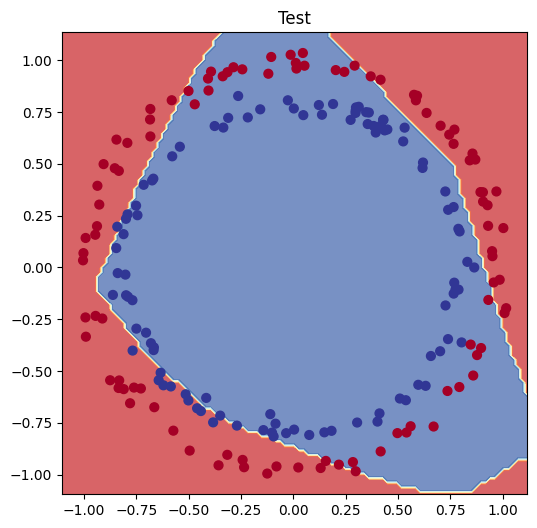

In [5]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


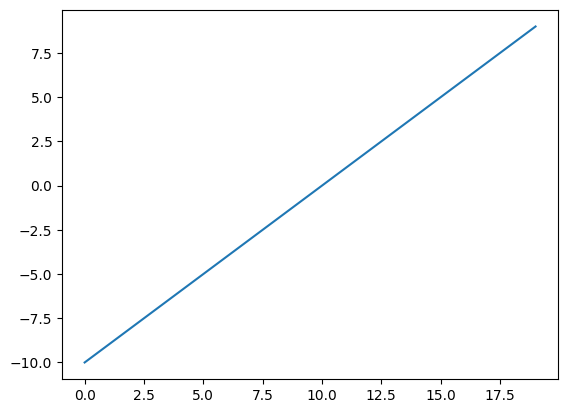

In [8]:
# replicating non-linear activation functions

# Much of the data you'll encounter in the wild is non-linear (or a combination of linear and non-linear)

A = torch.arange(-10, 10,1, dtype=torch.float32)
print(A)

plt.plot(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


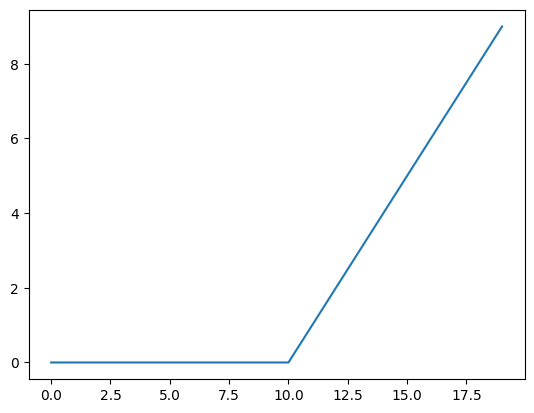

In [12]:
# how the ReLU activation function influences above
# Instead of using PyTorch's ReLU(torch.nn.ReLU), recreate it ourselves
# The ReLU function turns all negatives to 0 and leaves the positive values as they are (ReLU함수는 음수 값은 모두 0으로 바꾸고 양수 값은 그대로 둠)

def relu(x):
    return torch.maximum(torch.tensor(0),x) 

print(relu(A))
plt.plot(relu(A))

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])


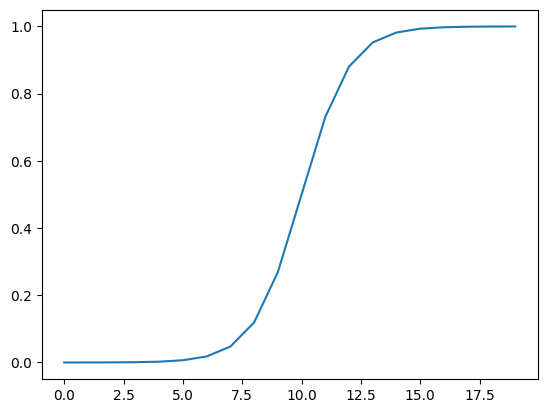

In [15]:
# replicate the sigmoid function
def sigmoid(x):
    return 1 / (1+torch.exp(-x))

print(sigmoid(A))

plt.plot(sigmoid(A))
# linear(straight)와 non-linear(not straight) (직선과 곡선)을 사용할 수 있다면, 대부분의 패턴을 그릴 수 있음
# That's exactly what out model is doing when we combine linear and non-linear functions (선형 함수와 비선형 함수를 결합하여 모델에서 하고 있는 일임)
# give models tools to figure out how to best discover patterns in the data, those tools are linear and non-linear functions (모델이 데이터에서 가장 잘 패턴을 찾아낼 수 있도록 도구를 제공)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


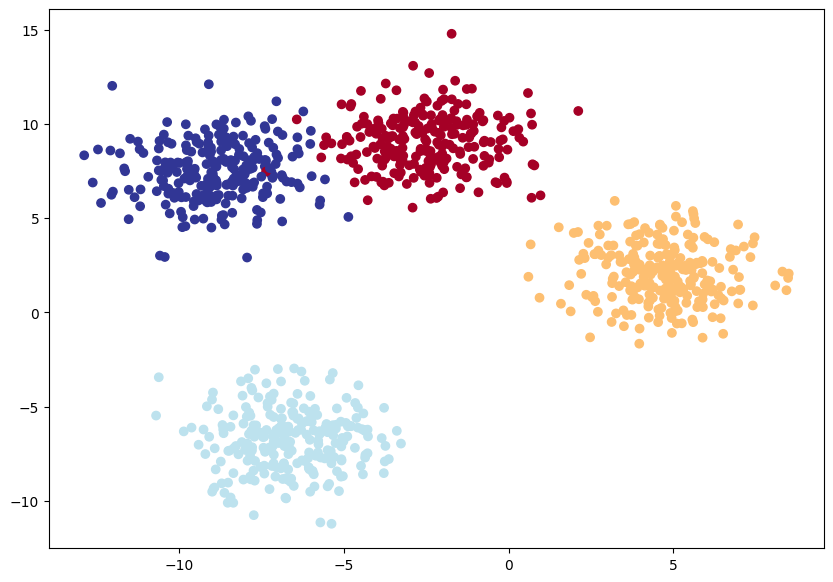

In [ ]:
# Putting things together by building a multi-class PyTorch model

# Creating multi-class classification data    # make_blobs() : this method will create however many classes (using the centers parameter) we want
# 1. Create some multi-class data with make_blobs()
# 2. Turn the data into tensors (the default of make_blobs() is to use NumPy arrays)
# 3. Split the data into training and test sets using train_test_split()
# 4. Visualize the data

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,   # 생성할 총 데이터 포인트 수
                            n_features=NUM_FEATURES,    # X features (데이터 포인트가 가질 특성 수)
                            centers = NUM_CLASSES,    # y labels (생성한 군집의 수)
                            cluster_std=1.5,    # 각 클러스터의 표준편차
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)

In [18]:
# building a multi-class classification model in PyTorch

# create a subclass of nn.Module that tkaes in three hyperparameters
 # 1. input_features : the number of x features coming into the model
 # 2. output_features : the ideal numbers of output features we'd like(this will be equivalent to NUM_CLASSES or the number of classes in multi-class classification problem)
                                                                       # 다중 클래스 분류 문제에서 분류해야 할 클래스의 개수와 동일
 # 3. hidden_units : the number of hidden neurons we'd like each hidden layer to use

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    def forward(self,x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
print(model_4)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [19]:
# creating a loss function and optimizer for a multi-class PyTorch model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1) 

In [23]:
# getting prediction probabilities for a multi-class PyTorch model
print(model_4(X_blob_train.to(device))[:5]) # raw outputs of the model (logits)

print()

print(model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES)

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

torch.Size([4]) 4


In [ ]:
# logits -> prediction probabilites -> prediction labels
# 위와 같은 변환을 위해서 softmax activation function이 필요함
# Softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes
y_logits = model_4(X_blob_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5],"\n")
print(y_pred_probs[:5],"\n")

# logits를 softmax 함수에 통과시킨 후, 각각의 개별 샘플의 값들은 모두 합쳐서 1이 됨(혹은 1에 매우 가까움)
print(torch.sum(y_pred_probs[0]),"\n")

# These prediction probabilities are essentially saying how much the model thinks the target X sample (the input) maps to each class 
# (이 예측 확률들은 모델이 특정 X가 각 클래스에 얼마나 해당한다고 생각하는지를 나타냄)
# y_pred_probs에는 각 클래스에 대한 값이 하나씩 있으므로, 가장 높은 값을 가진 인덱스가 모델이 특정 데이터 샘플이 가장 속할 가능성이 크다고 생각한 클래스임
# torch.argmax()를 사용하여 가장 큰 값을 가진 인덱스를 찾을 수 있음
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>) 

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>) 

tensor(1., device='cuda:0', grad_fn=<SumBackward0>) 

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


summary
1. model's raw output (logits)
2. For a multi-class classification problem, to turn the logits into prediction probabilites, use the softmax activation function(torch.softmax)
3. The index of the value with the highest prediction probability is the class number the model thinks is most likely given the input features for that sample

In [ ]:
# Creating a training and testing loop for a multi-class PyTorch model
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true = y_blob_train, y_pred = y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 99.50%


In [32]:
# Making and evaluating predictions with a PyTorch multi-class model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

print(y_logits[:10])

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')


In [34]:
y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = y_pred_probs.argmax(dim=1)

print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


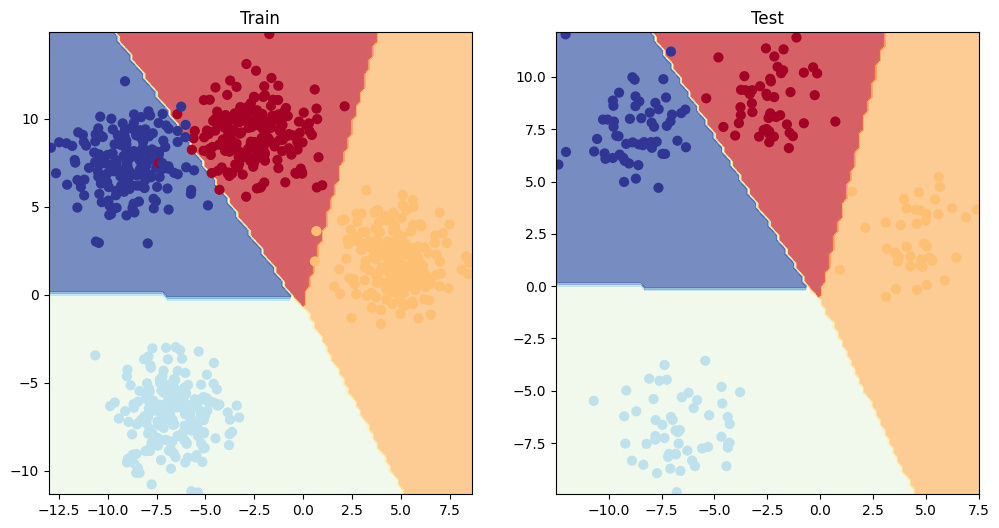

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

more classification evaluation metrics (분류 평가 지표)
1. Accuracy(정확도) : torchmetircs.Accuracy() or sklearn.metrics.accuracy_score()
  - 100개의 예측 중 모델이 맞춘 개수

2. Precision(정확도) : torchmetircs.Precision() or sklearn.metrics.precision_score()
  - Proportion of true positives over total number of samples (Higher precision leads to less false positives (실제 0인데 모델이 1으로 예측한 경우))

3. Recall(재현율) : torchmetrics.Recall() or sklearn.metrics.recall_score()
  - Proportion of true positives over total number of true positives and false negatives (실제 1인데 모델이 0으로 예측한 경우)
  - Higher recall leads to less false negatives

4. F1-score(F1 점수) : torchmetircs.F1Score() or sklearn.metrics.f1_score()
  - 정밀도(precision)와 재현율(recall)을 하나로 결합한 지표, 1 is best, 0 is worst

5. Confusion matrix(혼동 행렬) : torchmetrics.ConfusionMatrix or sklearn.metrics.plot_confusion_matrix()
  - 예측 값(predicted values)과 실제 값(true values)을 표 형태(in a tabular way)로 비교한 것
  - 100% 정확하면 행렬의 대각선(왼쪽 위부터 오른쪽 아래까지) 값이 있음

6. Classification report(분류 보고서) : sklearn.metrics.classification_report()
  - precision, recall, f1-score 등과 같은 주요 분류 지표들의 집합

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3
    from torchmetrics import Accuracy

# Accuracy는 모델의 예측값과 실제 정답을 비교하여 정확히 맞춘 예측의 비율을 계산 (Binary, Multiclass, Multilabel classification 모두 지원하지만 task파라미터를 통해 어떤 문제인지 제시해야함)
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

print(torchmetrics_accuracy(y_preds, y_blob_test))

tensor(0.9950, device='cuda:0')


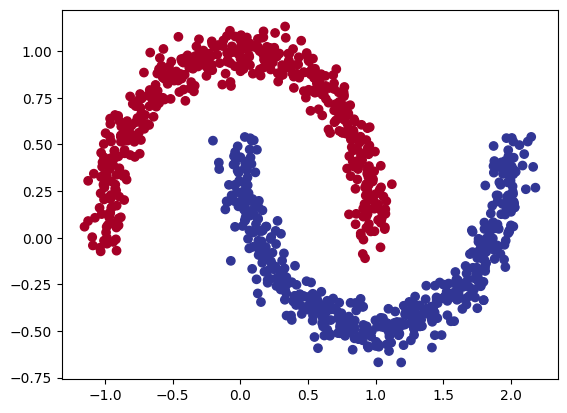

In [151]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
RAMDOM_SEED = 42

# 1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(1000, noise=0.07, random_state=RANDOM_SEED) # y는 라벨
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=RAMDOM_SEED)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [152]:
# 2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
import torch
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_m = MoonModelV0()
print(model_m)

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [153]:
# 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_m.parameters(), lr=0.01)

In [154]:
# 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1
logits = model_m(X_train)
print("Logits:")
print(logits)

print()

pred_prob = torch.sigmoid(logits)
print("Pred probs:")
print(pred_prob)

pred_label = torch.round(pred_prob).squeeze()
print("Pred labels:")
print(pred_label)

Logits:
tensor([[ 1.8501e-03],
        [ 9.4030e-03],
        [ 1.6095e-02],
        [ 1.8517e-02],
        [ 2.8377e-02],
        [ 1.9178e-02],
        [ 2.9134e-02],
        [ 1.9551e-02],
        [ 2.5831e-02],
        [ 7.8740e-03],
        [ 2.5733e-02],
        [ 2.2809e-02],
        [ 8.2902e-03],
        [ 2.3855e-02],
        [-2.3577e-03],
        [ 1.9765e-02],
        [ 3.0023e-02],
        [ 1.6951e-02],
        [ 1.3844e-02],
        [ 4.7600e-03],
        [ 8.3389e-04],
        [ 5.0719e-04],
        [ 7.3440e-03],
        [-2.2895e-03],
        [ 1.5155e-02],
        [ 1.4618e-02],
        [ 3.4843e-02],
        [ 2.5312e-02],
        [ 3.0422e-02],
        [ 2.6712e-02],
        [ 1.1984e-02],
        [ 3.7244e-02],
        [ 3.5634e-02],
        [ 1.0134e-03],
        [ 6.7761e-03],
        [ 2.3195e-02],
        [ 3.1082e-02],
        [-2.2794e-03],
        [ 2.5749e-02],
        [ 2.9642e-02],
        [ 3.3385e-02],
        [-2.0528e-03],
        [ 1.6145e-02],
   

In [155]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task = "multiclass", num_classes=2)

In [160]:
torch.manual_seed(RANDOM_SEED)

epochs=1000

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_m.train()

  # 1. Forward pass
  y_logits = model_m(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
  optimizer.step()

  ### Testing
  model_m.eval() 
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_m(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int()) 

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")
     

ValueError: Your data is binary and `num_classes=2`, but `multiclass` is not True. Set it to True if you want to transform binary data to multi-class format.

# PyTorch computer vision
computer vision is the art of teaching a computer to see (binary classification, multi-class classification, object detection, panoptic segmentation)
panoptic segmentation : figuring out where different objects in an image can be separated

0. Computer vision libraries in PyTorch - Pytorch has a bunch of built-in helpful computer vision libraries
1. Load data - To practice computer vision, start with some images of different pieces of clothing from FashionMNIST
2. Prepare data - load some images in with a PyTorch DataLoader so we can use them with training loop (PyTorch의 DataLoader를 사용하여 이미지를 학습 루프에 사용할 수 있도록 준비)
3. Model 0 : Building a baseline model - Create a multi-class classification model to learn patterns in the data, also choose a loss function, optimizer and build a training loop
4. Making predictions and evaluating model 0
5. Setup device agnostic code for future models
6. Model 1: Adding non-linearity - 비선형 계층(non-linearity layer)을 추가하여 baseline model을 개선
7. Model 2: Convolutional Neural Network(CNN)(합성곱 신경망) - 컴퓨터 비전에 특화된 내용으로 넘어가, 강력한 convolutional neural network architecture를 도입함
8. Comparing our models
9. Evaluating our best model - Make some predictions on random images and evaluate our best model
10. Making a confusion matrix(혼동 행렬)
11. Saving and loading the best performing model

# Computer vision libraries in PyTorch
1. torchvision - Contains datasets, model architectures and image transformations often used for computer vision problems
2. torchvision.datasets - Many example computer vision datasets for a range of problems from image classification, object detection(객체 탐지), image captioning, video classification and more. It also contains a series of base classes for making custom datasets
3. torchvision.models - Contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems
4. torchvision.transforms - Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here
5. torch.utils.data.Dataset - Base dataset class for PyTorch
6. torch.utils.data.DataLoader - Creates a Python iterable over a dataset (created with torch.utils.data.Dataset)

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.7.1+cu126
torchvision version: 0.22.1+cu126


In [6]:
# FashionMNIST
# to download it, we provide the following parameters
# 1. root: str - 데이터를 어떤 폴더에 다운로드할 것인지
# 2. train: Bool - do you want training or test split?
# 3. download: Bool - should the data be downloaded?
# 4. transform: torchvision.transforms - what transformations would you like to do on the data? (데이터를 어떤 방식으로 변환할 것인지?)
# 5. target_transform - transform the targets(label) (선택사항, 사용자의 필요에 따라)

train_data = datasets.FashionMNIST(
    root= "data",
    train=True,
    download =True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

image, label = train_data[0]
print(image)
print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
# input and output shapes of a computer vision model
print(image.shape) # color_channels, height, width

# having 'color_channels=1' means the image is grayscale

torch.Size([1, 28, 28])


In [ ]:
# The premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful
# (전제는 동일함: 데이터를 숫자로 변환하고, 그 숫자들에서 패턴을 찾을 수 있는 모델을 만들며, 그 패턴을 의미있는 무엇인가로 변환하는 것)

# If color_channels=3, the image comes in pixel values for red, green and blue (this is also known as the RGB color model)
# The order of our current tensor is often referred to as CHW (color channels, height, width)

# Pytorch generally accepts NCHW (channels first) as the default for many operators
# (++ however, PyTorch also explains that NHWC(channel last) performs better and is considered best practice. Keep it in mind for when working on larger image datasets and using convolutional neural networks)
# (PyTorch는 NHWC가 성능상 더 좋고, 모범 사례로 여겨진다고 설명, 이후 더 큰 이미지 데이터셋이나 CNN을 사용할 때는 알고 있어야함)
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))

class_names = train_data.classes
print(class_names)  # 10 classes -> multi-class classification

60000 60000 10000 10000
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

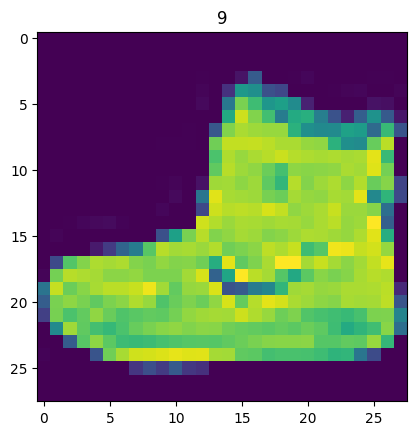

In [ ]:
# visualizing the data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())   # 2차원 또는 3차원 배열을 이미지로 화면에 출력해주는 함수
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

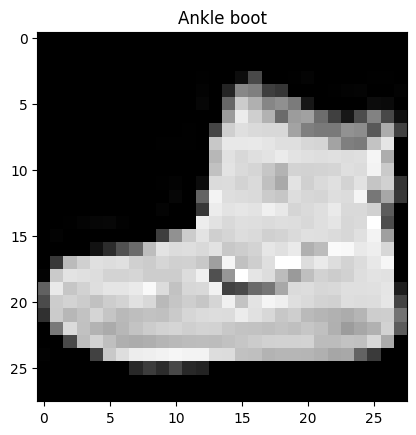

In [15]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

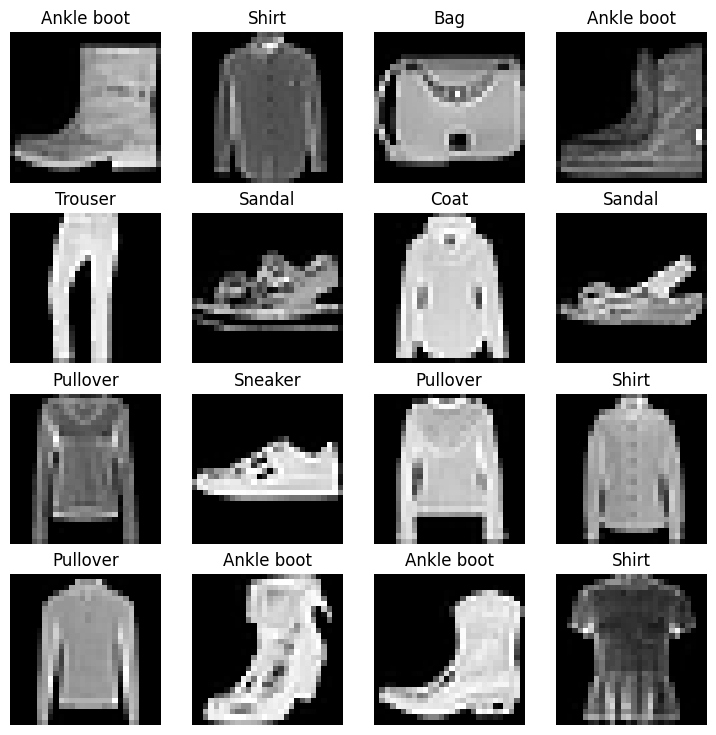

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)  # 축을 숨김